In [338]:
from sklearn.datasets import make_blobs, make_moons
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

La dimension de X est (2, 200)
La dimension de y est (1, 200)


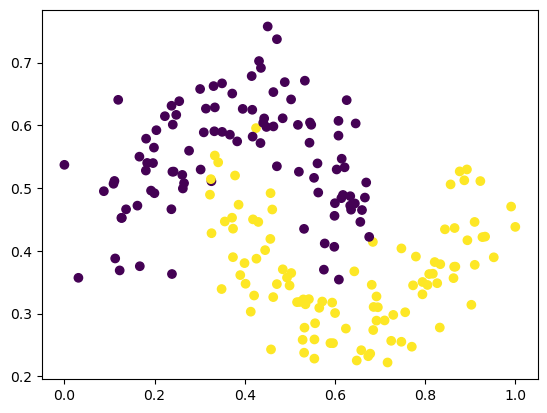

In [339]:
X, y = make_moons(n_samples=200, noise=0.2, random_state=40)
X = (X - X.min()) * 1/(X.max()-X.min())
y = y.reshape(y.shape[0], 1)
X = X.T
y = y.T
print('La dimension de X est', X.shape)
print('La dimension de y est', y.shape)
plt.figure()
plt.scatter(X[0,:], X[1,:], c=y)
plt.show()

In [340]:
def initialiser(dim):
    
    couches = len(dim) - 1
    parametres = {}
    for couche in range(couches):
        parametres['W' + str(couche+1)] = np.random.randn(dim[couche+1],dim[couche])
        parametres['B' + str(couche+1)] = np.random.randn(dim[couche+1], 1)
    return parametres
    

In [341]:
def forward_propagation(X, parametres):

    couches = len(parametres) // 2
    activations = {
        'A0' : X
    }
    for couche in range(couches):
        W = parametres['W' + str(couche+1)]
        B = parametres['B' + str(couche+1)]
        A = activations['A' + str(couche)]
        Z = W.dot(A) + B
        activations['A' + str(couche+1)] = 1 / (1 + np.exp(-Z))
    
        
    return activations

In [342]:
def log_loss(activations, y):
    epsi = np.exp(-15)
    couches = len(activations) - 1
    A = activations['A' + str(couches)]
    m = y.shape[1]
    return np.sum(y*np.log(A+epsi) + (1-A)*np.log(1-A+epsi))/-m

In [343]:
def back_propagation(activations, y, parametres):

    m = y.shape[1]
    couches = len(activations) - 1
    dZ = activations['A' + str(couches)] - y
    gradients = {}

    for i in range(couches):
        couche = couches-i
        A = activations['A' + str(couche-1)]
        gradients['dW' + str(couche)] = dZ.dot(A.T)
        gradients['dB' + str(couche)] = np.sum(dZ, axis=1, keepdims=True)

        W = parametres['W' + str(couche)]
        dZ = (W.T).dot(dZ) * A* (1-A)
        

    return gradients

In [344]:
def update_params(parametres, gradients, learning_rate):

    couches = len(parametres) // 2

    for c in range(couches):
        couche = c+1
        W = parametres['W' + str(couche)]
        dW = gradients['dW' + str(couche)]
        parametres['W' + str(couche)] = W - (learning_rate * dW)

        B = parametres['B' + str(couche)]
        dB = gradients['dB' + str(couche)]
        parametres['B' + str(couche)]  = B - (learning_rate * dB)

    return parametres

In [345]:
def check_values(dictionnaire):
    for cle,valeur in dictionnaire.items():
        print(cle, valeur.shape)
    print()

In [368]:
def neuronal_network(X, y, dim, n_iter, learning_rate):

    params = initialiser(dim)
    print("Les parametres")
    check_values(params)
    loss = []

    for i in tqdm(range(n_iter)):

        activations = forward_propagation(X, params)
        
        if i%10000:
            loss.append(log_loss(activations, y))
        
        gradients = back_propagation(activations, y, params)
        params = update_params(params, gradients, learning_rate)
        
        
    plt.figure(figsize=(12,7))
    plt.plot(loss)
    plt.show
    return params

Les parametres
W1 (3, 2)
B1 (3, 1)
W2 (3, 3)
B2 (3, 1)
W3 (1, 3)
B3 (1, 1)



100%|█████████████████████████████████| 100000/100000 [00:32<00:00, 3037.49it/s]


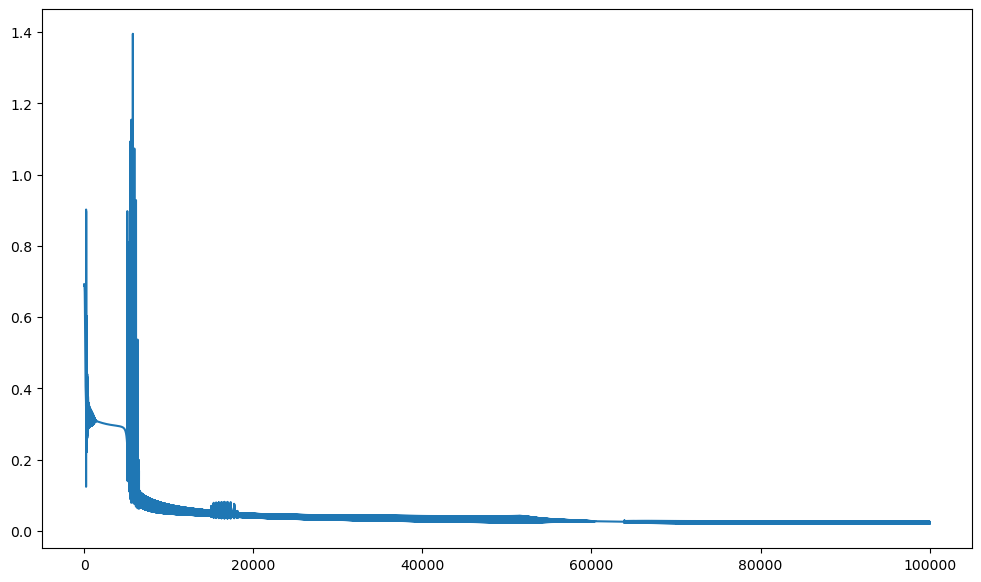

In [369]:
dim = [3,3]
dim.insert(0, X.shape[0])
dim.append(1)
n_iter = 100000
learning_rate = 0.01
params = neuronal_network(X, y, dim, n_iter, learning_rate)

In [366]:
def plot_decision_boundary(forward_propagation, parametres, X, y):
    # 1. Définir les limites du plan (selon tes données)
    x_min, x_max = X[:, 0].min()-0.2, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    
    # 2. Forward sur la grille
    grid = np.c_[xx.ravel(), yy.ravel()]          # (N,2)
    A = forward_propagation(grid.T, parametres)   # ATTENTION: souvent X est (features, samples)
    Z = A['A'+str(len(A)-1)]
    # 3. Adapter les prédictions
    if Z.shape[0] > 1:   # si plusieurs sorties
        Z = np.argmax(Z, axis=0)
    else:                # binaire (sigmoid)
        Z = (Z > 0.5).astype(int)
    
    Z = Z.reshape(xx.shape)
    
    # 4. Tracé
    
    plt.scatter(X[0,:], X[1,:], c=y)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="bwr")       # zones prédictes
    plt.xlabel("Variable 1")
    plt.ylabel("Variable 2")
    plt.title("Frontière de décision du réseau")
    plt.show()


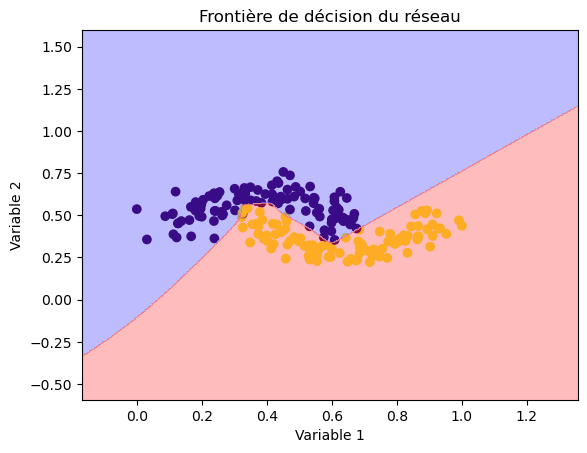

In [367]:
plot_decision_boundary(forward_propagation, params, X, y)

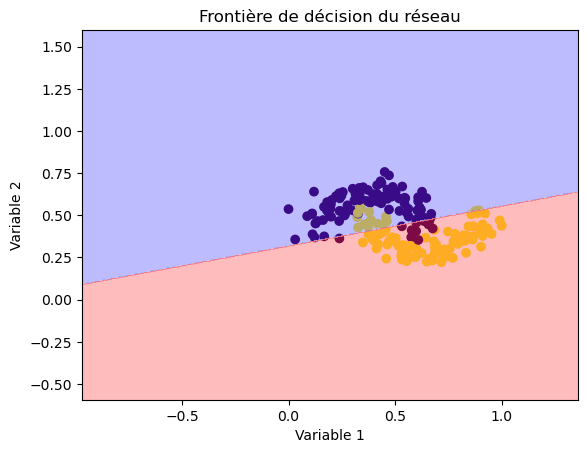

In [353]:
plot_decision_boundary(forward_propagation, params, X, y)